<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1_Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sympy import symbols, pi, simplify, solve, diff, Matrix, pprint

# Declarar las variables simbólicas
fi, fi_p, fi_pp, p, p_p, p_pp = symbols('fi fi_p fi_pp p p_p p_pp')
M, m, u, long, Fricc, g = symbols('M m u long Fricc g')

print("Para el equilibrio estable")

# Valor del ángulo inicial en equilibrio
ang_inic = pi

# Ecuación para p_pp
p_pp_expr = (1 / (M + m)) * (u + m * long * fi_pp + m * long * fi_p**2 * (pi - fi) - Fricc * p_p)

# Ecuación para fi_pp, considerando sin(fi) ≈ pi - fi
fi_pp_expr = solve(fi_pp - (1 / long) * (g * (pi - fi) + p_pp_expr), fi_pp)[0]

print('fi_pp =')
pprint(simplify(fi_pp_expr))

# Sustituir fi_pp en p_pp
p_pp_expr = p_pp_expr.subs(fi_pp, fi_pp_expr)

print('p_pp =')
pprint(simplify(p_pp_expr))

# Evaluar derivadas para construir la matriz A, alrededor del punto de equilibrio
subs_dict = {p: 0, p_p: 0, fi: ang_inic, fi_p: 0}

A_row2 = [
    simplify(diff(p_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]
A_row4 = [
    simplify(diff(fi_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]

# Matriz A final
Mat_A = Matrix([
    [0, 1, 0, 0],
    A_row2,
    [0, 0, 0, 1],
    A_row4
])

print("Matriz A =")
pprint(Mat_A)


Para el equilibrio estable
fi_pp =
                                       2                            
-Fricc⋅pₚ - M⋅g⋅(fi - π) - fi⋅g⋅m - fiₚ ⋅long⋅m⋅(fi - π) + π⋅g⋅m + u
────────────────────────────────────────────────────────────────────
                               M⋅long                               
p_pp =
                  2                        2                   
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m + u
───────────────────────────────────────────────────────────────
                               M                               
Matriz A =
⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   g⋅(-M - m)   ⎥
⎢0  ───────  ──────────  0⎥
⎣   M⋅long     M⋅long     ⎦


In [23]:
from sympy import symbols, pi, simplify, solve, diff, Matrix, pprint

# Declarar las variables simbólicas
fi, fi_p, fi_pp, p, p_p, p_pp = symbols('fi fi_p fi_pp p p_p p_pp')
M, m, u, long, Fricc, g = symbols('M m u long Fricc g')

print("Para el equilibrio inestable")

# Ángulo de equilibrio inestable
ang_inic = 0

# Ecuación para p_pp (sin aproximación aún)
p_pp_expr = (1 / (M + m)) * (u + m * long * fi_pp + m * long * fi_p**2 * (pi - fi) - Fricc * p_p)

# Aproximación: sin(fi) ≈ fi, cos(fi) ≈ 1 => fi_pp = (1/long) * (-g * fi + p_pp)
fi_pp_expr = solve(fi_pp - (1 / long) * (-g * fi + p_pp_expr), fi_pp)[0]

print('fi_pp =')
pprint(simplify(fi_pp_expr))

# Sustituir fi_pp en p_pp
p_pp_expr = p_pp_expr.subs(fi_pp, fi_pp_expr)

print('p_pp =')
pprint(simplify(p_pp_expr))

# Evaluar en el punto de equilibrio
subs_dict = {p: 0, p_p: 0, fi: ang_inic, fi_p: 0}

# Matriz A: derivadas parciales respecto de [p, p_p, fi, fi_p]
A_row2 = [
    simplify(diff(p_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]
A_row4 = [
    simplify(diff(fi_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]

# Matriz B: derivadas parciales respecto de la entrada u
B_row2 = simplify(diff(p_pp_expr, u).subs(subs_dict))
B_row4 = simplify(diff(fi_pp_expr, u).subs(subs_dict))

# Matrices A y B
Mat_A = Matrix([
    [0, 1, 0, 0],
    A_row2,
    [0, 0, 0, 1],
    A_row4
])

Mat_B = Matrix([
    [0],
    [B_row2],
    [0],
    [B_row4]
])

print('Matriz A =')
pprint(Mat_A)

print('Matriz B =')
pprint(Mat_B)


Para el equilibrio inestable
fi_pp =
                                 2                    
-Fricc⋅pₚ - M⋅fi⋅g - fi⋅g⋅m - fiₚ ⋅long⋅m⋅(fi - π) + u
──────────────────────────────────────────────────────
                        M⋅long                        
p_pp =
                  2                        2           
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + u
───────────────────────────────────────────────────────
                           M                           
Matriz A =
⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   g⋅(-M - m)   ⎥
⎢0  ───────  ──────────  0⎥
⎣   M⋅long     M⋅long     ⎦
Matriz B =
⎡  0   ⎤
⎢      ⎥
⎢  1   ⎥
⎢  ─   ⎥
⎢  M   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  1   ⎥
⎢──────⎥
⎣M⋅long⎦


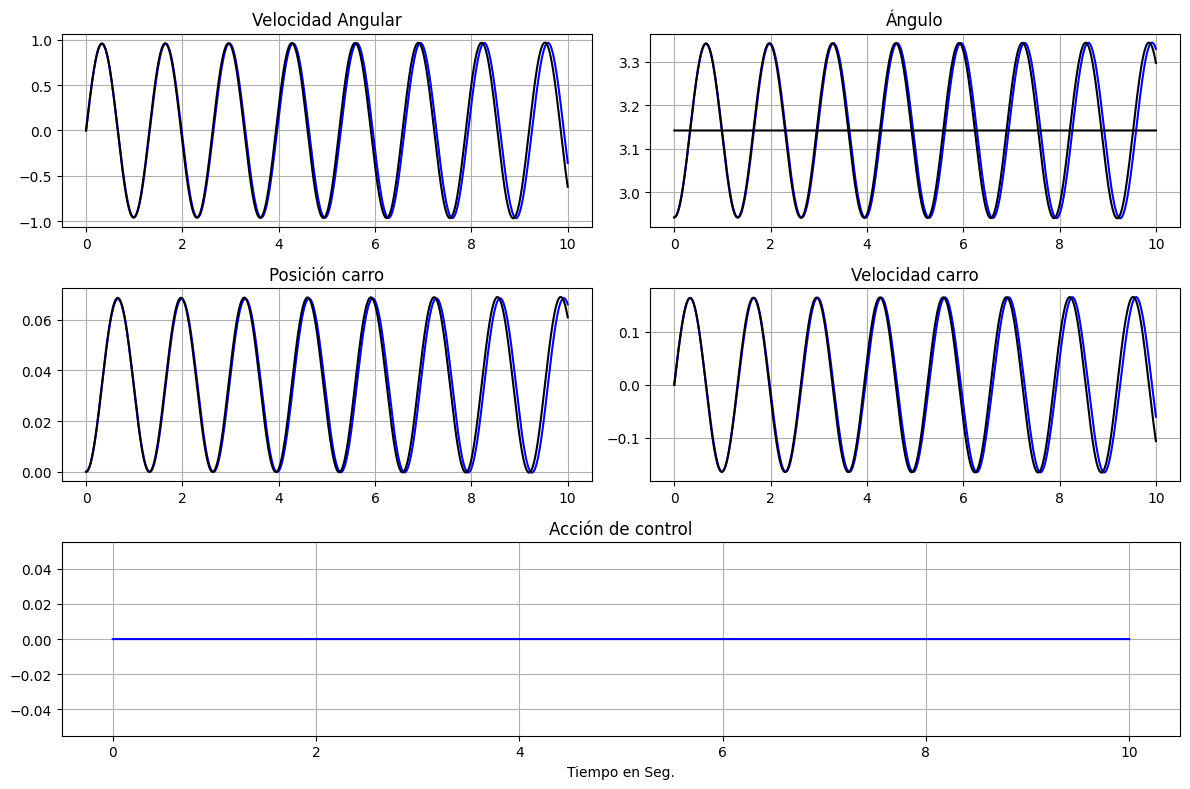

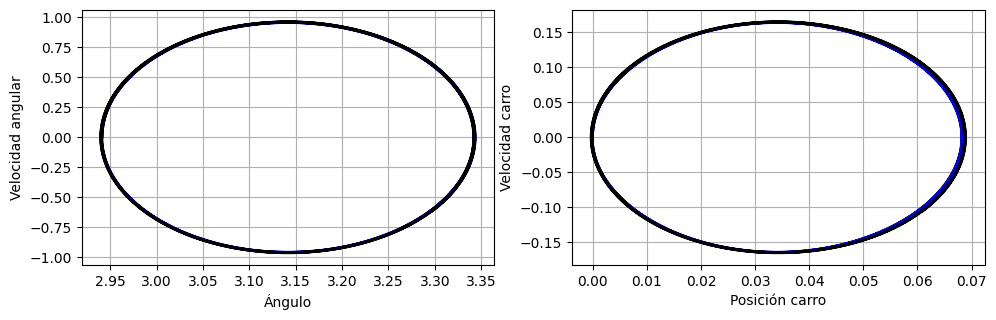

TCalculo = 5.738618850708008 segundos


In [43]:
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

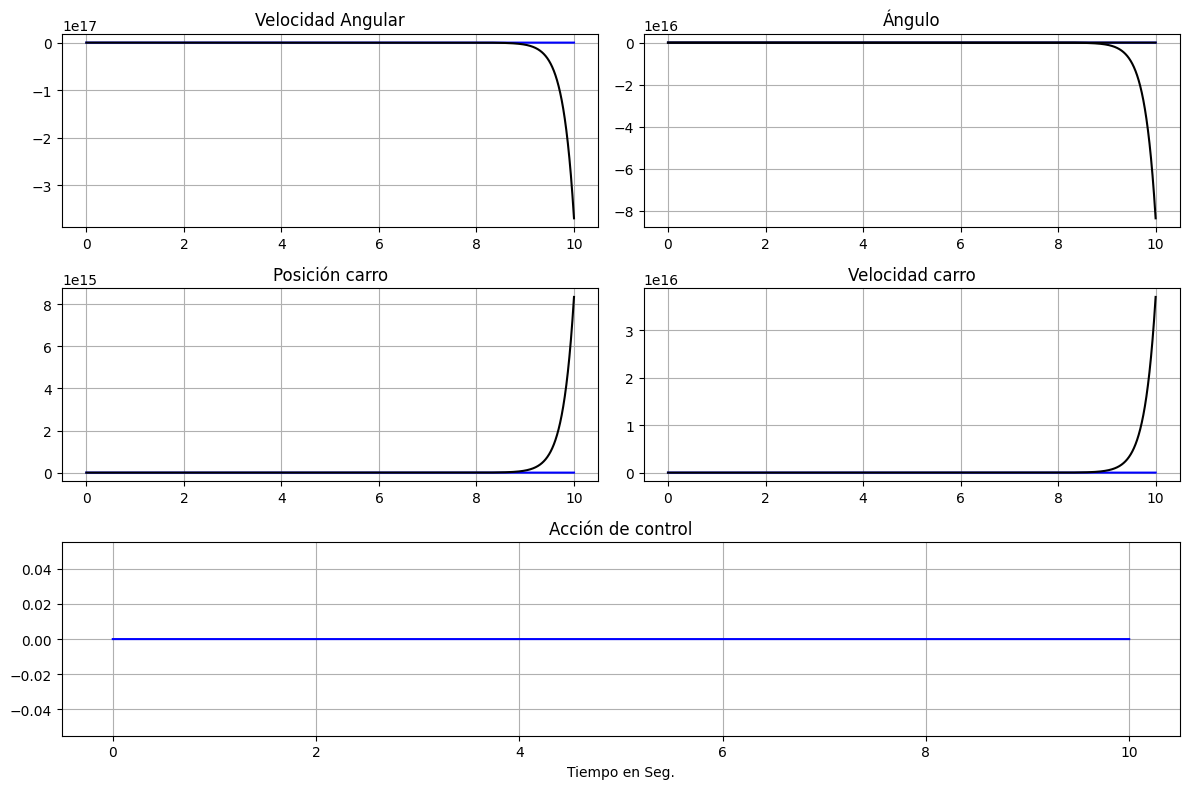

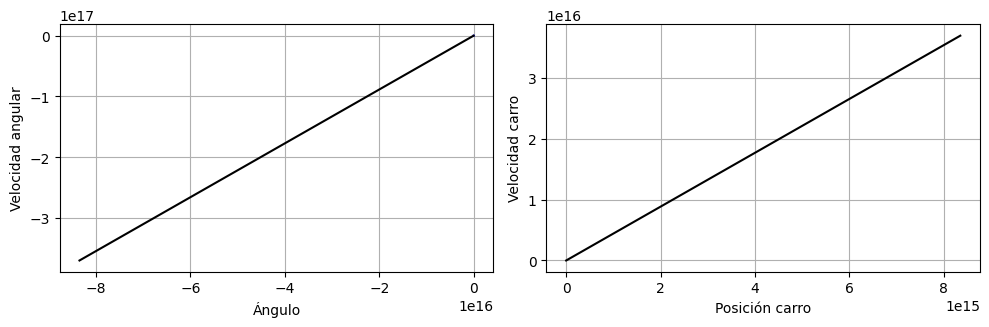

TCalculo = 5.8858373165130615 segundos


In [31]:
#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Parámetros
m = 0.1
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicialización
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable φ ≈ 0)
alfa[0] = -0.01  # pequeño desvío desde φ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable φ ≈ 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicialización resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulación
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de términos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aquí)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el último paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # último valor

# ---------- Gráficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("Ángulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posición carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acción de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("Ángulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posición carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de cómputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")